In [16]:
import pandas as pd
file=r"E:\manuscipt\sorting_plastic\VGG-plastic\data-prophet.xlsx"
df=pd.read_excel(file)
df.head()

,ds,y
0,2004-12-31,8.38
1,2005-12-31,7.86
2,2006-12-31,8.99
3,2007-12-31,10.14
4,2008-12-31,11.25


In [17]:
from fbprophet import Prophet

#instantiate Prophet with only yearly seasonality as our data is monthly 
model = Prophet()
model.fit(df) #fit the model with your dataframe

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.


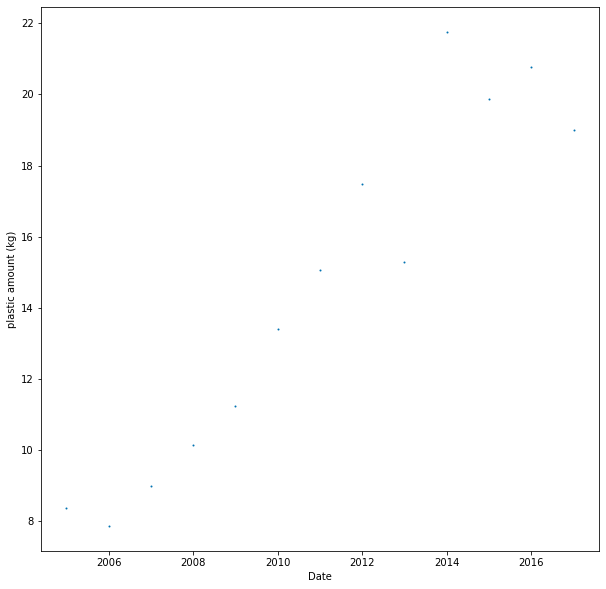

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(pd.to_datetime(df['ds']),df['y'],s=1,c='#0072B2')
plt.xlabel('Date')
plt.ylabel('plastic amount (kg)')
plt.show()

In [19]:
future = model.make_future_dataframe(periods = 8, freq = 'Y') 
#forecast.columns
# now lets make the forecasts
forecast = model.predict(future)

pd.set_option('display.max_rows', None)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-12-31,-8.898082,5.009973,8.547341,-8.898082,-8.898082,15.679446,15.679446,15.679446,15.679446,15.679446,15.679446,0.0,0.0,0.0,6.781363
1,2005-12-31,-7.709007,6.837222,10.403035,-7.709007,-7.709007,16.272910,16.272910,16.272910,16.272910,16.272910,16.272910,0.0,0.0,0.0,8.563903
2,2006-12-31,-6.519932,8.460505,11.963769,-6.519932,-6.519932,16.666915,16.666915,16.666915,16.666915,16.666915,16.666915,0.0,0.0,0.0,10.146983
3,2007-12-31,-5.330857,9.743344,13.306321,-5.330857,-5.330857,16.861010,16.861010,16.861010,16.861010,16.861010,16.861010,0.0,0.0,0.0,11.530153
4,2008-12-31,-4.138524,9.757483,13.348204,-4.138524,-4.138524,15.679446,15.679446,15.679446,15.679446,15.679446,15.679446,0.0,0.0,0.0,11.540921
5,2009-12-31,-2.949449,11.588227,15.226119,-2.949449,-2.949449,16.272910,16.272910,16.272910,16.272910,16.272910,16.272910,0.0,0.0,0.0,13.323461
6,2010-12-31,-1.760374,13.081940,16.800670,-1.760374,-1.760374,16.666915,16.666915,16.666915,16.666915,16.666915,16.666915,0.0,0.0,0.0,14.906541
7,2011-12-31,-0.571299,14.475867,18.139992,-0.571299,-0.571299,16.861010,16.861010,16.861010,16.861010,16.861010,16.861010,0.0,0.0,0.0,16.289711
8,2012-12-31,0.621034,14.454984,18.115880,0.621034,0.621034,15.679446,15.679446,15.679446,15.679446,15.679446,15.679446,0.0,0.0,0.0,16.300479
9,2013-12-31,1.810109,16.193726,19.889171,1.810109,1.810109,16.272910,16.272910,16.272910,16.272910,16.272910,16.272910,0.0,0.0,0.0,18.083019


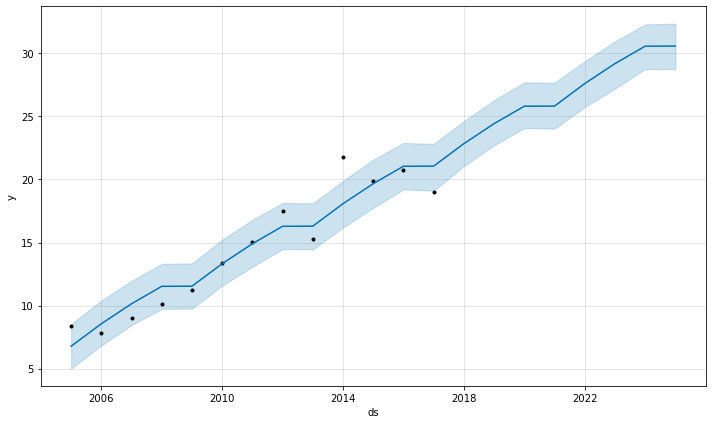

In [20]:
fig = model.plot(forecast)
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [22]:
def evaluate_forecast(y,pred):
    results = pd.DataFrame({'r2_score':r2_score(y, pred),
                           }, index=[0])
    results['mean_absolute_error'] = mean_absolute_error(y, pred)
    results['median_absolute_error'] = median_absolute_error(y, pred)
    results['mse'] = mean_squared_error(y, pred)
    results['msle'] = mean_squared_log_error(y, pred)
    results['mape'] = mean_absolute_percentage_error(y, pred)
    results['rmse'] = np.sqrt(results['mse'])
    return results

<AxesSubplot:xlabel='ds'>

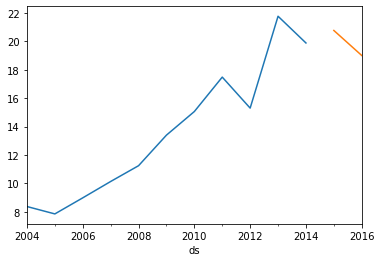

In [23]:
y=df.set_index('ds')
y.head()
train = y[:int(0.90*(len(y)))]
valid = y[int(0.85*(len(y))):]
#plotting the data
train['y'].plot()
valid['y'].plot()

In [24]:
start_index = valid.index.min()
end_index = valid.index.max()
train_prophet = pd.DataFrame()
train_prophet['ds'] = train.index
train_prophet['y'] = train.y.values

In [25]:
train_prophet.head()

,ds,y
0,2004-12-31,8.38
1,2005-12-31,7.86
2,2006-12-31,8.99
3,2007-12-31,10.14
4,2008-12-31,11.25


In [26]:
from fbprophet import Prophet

#instantiate Prophet with only yearly seasonality as our data is monthly 
model = Prophet(uncertainty_samples=100,weekly_seasonality=3,changepoint_prior_scale=0.11999946)
model.fit(train_prophet) #fit the model with your dataframe

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


In [27]:
future = model.make_future_dataframe(periods = 10, freq = 'Y') 
#forecast.columns
# now lets make the forecasts
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2004-12-31,8.380000,8.380000,8.380000
1,2005-12-31,7.860000,7.860000,7.860000
2,2006-12-31,8.990000,8.990000,8.990000
3,2007-12-31,10.140000,10.140000,10.140000
4,2008-12-31,11.250000,11.250000,11.250000
5,2009-12-31,13.400000,13.400000,13.400000
6,2010-12-31,15.060000,15.060000,15.060000
7,2011-12-31,17.480000,17.480000,17.480000
8,2012-12-31,15.300000,15.300000,15.300000
9,2013-12-31,21.760000,21.760000,21.760000


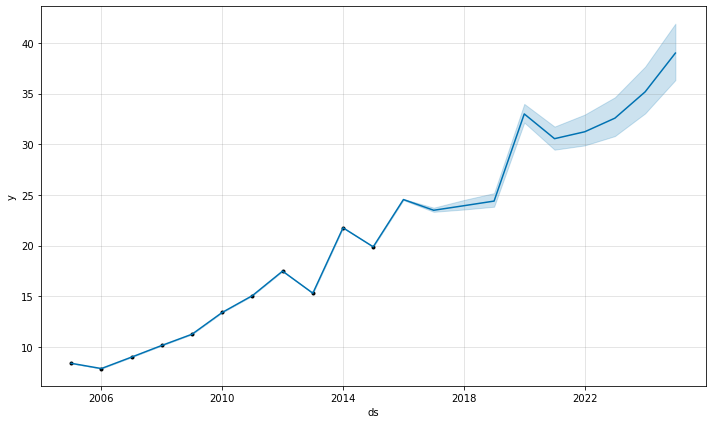

In [28]:
import matplotlib.pyplot as plt
fig = model.plot(forecast)
#plot the predictions for validation set
#plt.plot(valid, label='Valid', color = 'red', linewidth = 2)
plt.show()

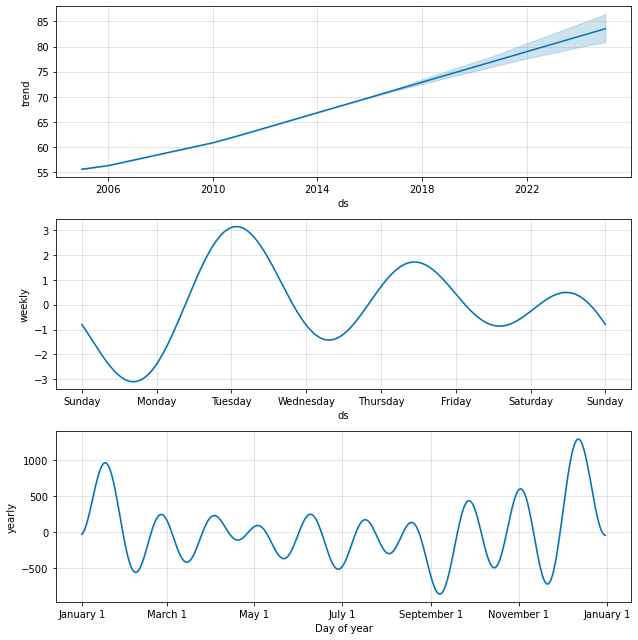

In [29]:
model.plot_components(forecast);

In [30]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np


def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_prophet = pd.DataFrame()
y_prophet['ds'] = y.index
y_prophet['y'] = y.y.values
y_prophet = y_prophet.set_index('ds')
forecast_prophet = forecast.set_index('ds')
evaluate_forecast(y_prophet.y[start_index:end_index], forecast_prophet.yhat[start_index:end_index])

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,mape,rmse
0,-21.28084,4.139024,4.139024,17.254283,0.033387,20.939085,4.153827
